2.3.3 線形モデル

In [1]:
import mglearn
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge

w[0]: 0.393906  b: -0.031804


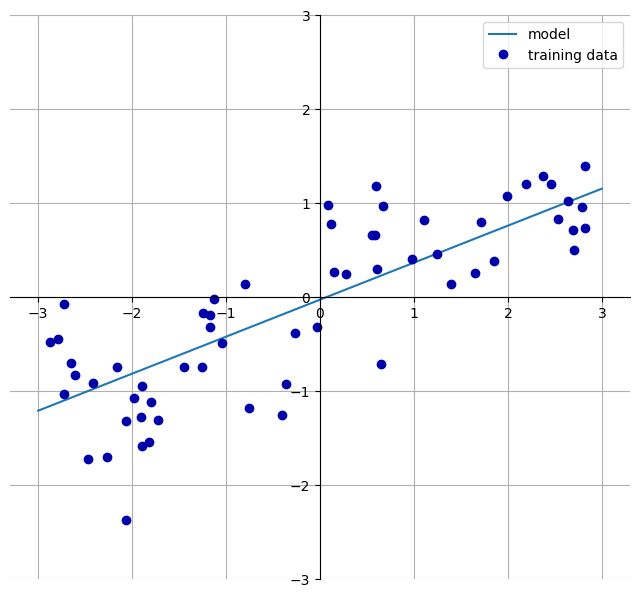

In [2]:
mglearn.plots.plot_linear_regression_wave()

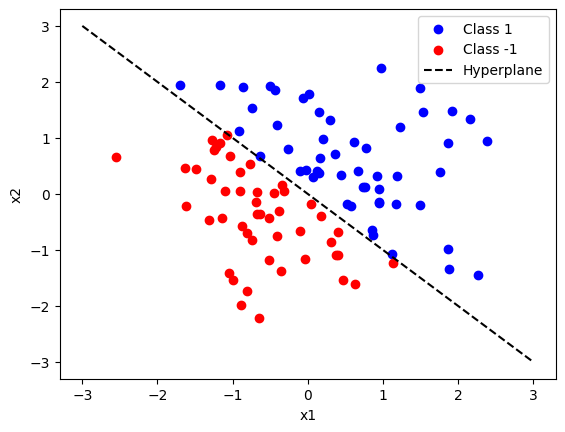

In [3]:
# 超平面の説明
import numpy as np
import matplotlib.pyplot as plt

# サンプルデータの生成
np.random.seed(0)
X = np.random.randn(100, 2)
y = np.where(X[:, 0] + X[:, 1] > 0, 1, -1)

# 超平面のパラメータ
w = np.array([1, 1])
b = 0

# 超平面のプロット
x1 = np.linspace(-3, 3, 100)
x2 = -(w[0] * x1 + b) / w[1]

plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], color='blue', label='Class 1')
plt.scatter(X[y == -1][:, 0], X[y == -1][:, 1], color='red', label='Class -1')
plt.plot(x1, x2, color='black', linestyle='--', label='Hyperplane')
plt.xlabel('x1')
plt.ylabel('x2')
plt.legend()
plt.show()

In [4]:
from sklearn.linear_model import LinearRegression
X, y = mglearn.datasets.make_wave(n_samples=60)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

lr = LinearRegression().fit(X_train, y_train)

In [5]:
print("lr.coef_: {}".format(lr.coef_))
print("lr.intercept_: {}".format(lr.intercept_))

lr.coef_: [0.39390555]
lr.intercept_: -0.031804343026759746


In [6]:
print("Training set score: {:.2f}".format(lr.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lr.score(X_test, y_test)))

# 適合不足であって，過剰適合ではない

Training set score: 0.67
Test set score: 0.66


In [7]:
X, y = mglearn.datasets.load_extended_boston()

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
lr = LinearRegression().fit(X_train, y_train)

In [8]:
print("Training set score: {:.2f}".format(lr.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lr.score(X_test, y_test)))

# 過剰適合が起きている

Training set score: 0.95
Test set score: 0.61


2.3.3.3 リッジ回帰

In [9]:
from sklearn.linear_model import Ridge

ridge = Ridge().fit(X_train, y_train)
print("Traingin set score: {:.2f}".format(ridge.score(X_train, y_train)))
print("Test set score: {:.2f}".format(ridge.score(X_test, y_test)))

Traingin set score: 0.89
Test set score: 0.75


In [10]:
ridge10 = Ridge(alpha=10).fit(X_train, y_train)
print("Training set score: {:.2f}".format(ridge10.score(X_train, y_train)))
print("Test set score: {:.2f}".format(ridge10.score(X_test, y_test)))

# alphaを大きくすると，計数はより0に近くなり，
# 訓練セットに対する性能は低下するが，汎化性能は向上する

Training set score: 0.79
Test set score: 0.64


In [11]:
ridge01 = Ridge(alpha=0.1).fit(X_train, y_train)
print("Training set score: {:.2f}".format(ridge01.score(X_train, y_train)))
print("Test set score: {:.2f}".format(ridge01.score(X_test, y_test)))

# alphaを小さくすると，係数の制約は小さくなる．

# alphaが非常に小さい値になると，係数への制約はほとんどなくなり，
# 線形回帰(LinearRegression)と同じになる

Training set score: 0.93
Test set score: 0.77


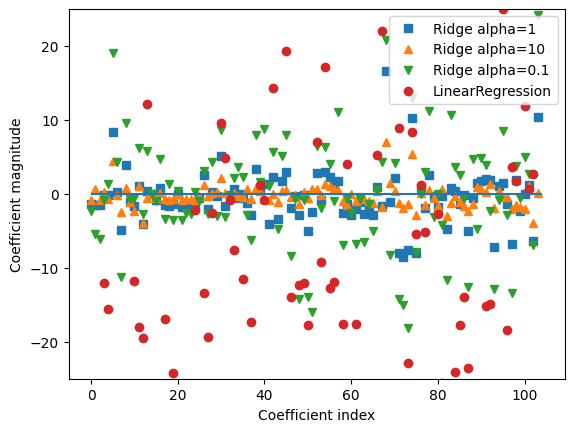

In [12]:
plt.plot(ridge.coef_, 's', label="Ridge alpha=1")
plt.plot(ridge10.coef_, '^', label="Ridge alpha=10")
plt.plot(ridge01.coef_, 'v', label="Ridge alpha=0.1")

plt.plot(lr.coef_, 'o', label="LinearRegression")
plt.xlabel("Coefficient index")
plt.ylabel("Coefficient magnitude")

plt.hlines(0, 0, len(lr.coef_))
plt.ylim(-25, 25)
plt.legend()

In [13]:
#  結果の説明
"""
この図は、異なる正則化パラメータ（alpha）を持つリッジ回帰モデルと通常の線形回帰モデルの係数を比較しています。

横軸（Coefficient index）:
- 特徴量（説明変数）のインデックスを表しています。
- 0から100以上まであることから、100以上の特徴量がモデルに使用されていることがわかります。

縦軸（Coefficient magnitude）:
- 各特徴量に対応する係数の大きさ（値）を表しています。
- -25から25の範囲で表示されています。

図の解説:
1. LinearRegression（赤い丸）:
   - 係数の値が最も広く分布しており、-20から20の範囲に散らばっています。
   - これは正則化がないため、過学習の可能性が高いモデルを示しています。

2. Ridge alpha=0.1（緑の逆三角形）:
   - 弱い正則化を表し、LinearRegressionに近い分布を示しますが、やや抑制されています。

3. Ridge alpha=1（青い四角）:
   - 中程度の正則化を表し、係数の多くが-5から5の範囲に収まっています。

4. Ridge alpha=10（オレンジの三角形）:
   - 強い正則化を表し、ほとんどの係数が0に近い値に抑えられています。

この図は、リッジ回帰におけるalphaパラメータの効果を視覚化しています。alphaが大きくなるほど、係数が0に近づき（縮小し）、モデルがより単純になることを示しています。これは過学習を防ぎ、モデルの汎化性能を向上させる効果があります。"""

'\nこの図は、異なる正則化パラメータ（alpha）を持つリッジ回帰モデルと通常の線形回帰モデルの係数を比較しています。\n\n横軸（Coefficient index）:\n- 特徴量（説明変数）のインデックスを表しています。\n- 0から100以上まであることから、100以上の特徴量がモデルに使用されていることがわかります。\n\n縦軸（Coefficient magnitude）:\n- 各特徴量に対応する係数の大きさ（値）を表しています。\n- -25から25の範囲で表示されています。\n\n図の解説:\n1. LinearRegression（赤い丸）:\n   - 係数の値が最も広く分布しており、-20から20の範囲に散らばっています。\n   - これは正則化がないため、過学習の可能性が高いモデルを示しています。\n\n2. Ridge alpha=0.1（緑の逆三角形）:\n   - 弱い正則化を表し、LinearRegressionに近い分布を示しますが、やや抑制されています。\n\n3. Ridge alpha=1（青い四角）:\n   - 中程度の正則化を表し、係数の多くが-5から5の範囲に収まっています。\n\n4. Ridge alpha=10（オレンジの三角形）:\n   - 強い正則化を表し、ほとんどの係数が0に近い値に抑えられています。\n\nこの図は、リッジ回帰におけるalphaパラメータの効果を視覚化しています。alphaが大きくなるほど、係数が0に近づき（縮小し）、モデルがより単純になることを示しています。これは過学習を防ぎ、モデルの汎化性能を向上させる効果があります。'

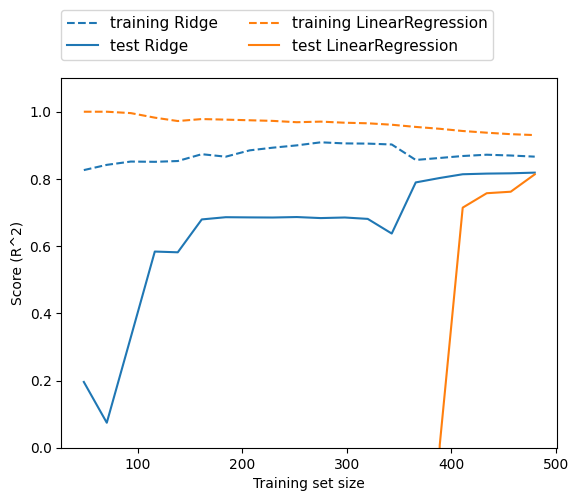

In [14]:
mglearn.plots.plot_ridge_n_samples()

2.3.3.4 ラッソ回帰
###### ラッソ回帰では計数ベクトルのL1ノルム，すなわち係数の絶対値の和にペナルティを与える(L1正則化)．

In [15]:
from sklearn.linear_model import Lasso

lasso = Lasso().fit(X_train, y_train)
print(("Training set score: {:.2f}".format(lasso.score(X_train, y_train)))) 
print("test set score: {:.2f}".format(lasso.score(X_test, y_test)))
print("Number of features used: {}".format(np.sum(lasso.coef_ != 0)))
"""
Training set score: 0.29
test set score: 0.21
Number of features used: 4
"""

Training set score: 0.29
test set score: 0.21
Number of features used: 4


'\nTraining set score: 0.29\ntest set score: 0.21\nNumber of features used: 4\n'

In [16]:
# "max_iter"の値を増やしている．
# こうしておかないとモデルが，"max_iter"を増やすように警告を発する

lasso001 = Lasso(alpha=0.01, max_iter=100000).fit(X_train, y_train)
print("Training set score: {:.2f}".format(lasso001.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lasso001.score(X_test, y_test)))
print("Number of features usef: {}".format(np.sum(lasso001.coef_ != 0)))

Training set score: 0.90
Test set score: 0.77
Number of features usef: 33


In [17]:
# alpha は、Lasso 回帰モデルにおける正則化パラメータです。
# このパラメータは、モデルの複雑さを制御し、過学習を防ぐために使用されます。
# 具体的には、alpha の値が大きいほど、正則化の強度が増し、係数がゼロに近づきやすくなります。
# 逆に、alpha の値が小さいほど、正則化の強度が弱まり、モデルはデータに対してより柔軟になります。

In [18]:
lasso00001 = Lasso(alpha=0.0001, max_iter=100000).fit(X_train, y_train)
print("Training set score: {:.2f}".format(lasso00001.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lasso00001.score(X_test, y_test)))
print("Number of features used: {}".format(np.sum(lasso00001.coef_ != 0)))

Training set score: 0.95
Test set score: 0.64
Number of features used: 96


Text(0, 0.5, 'Coefficient magnitude')

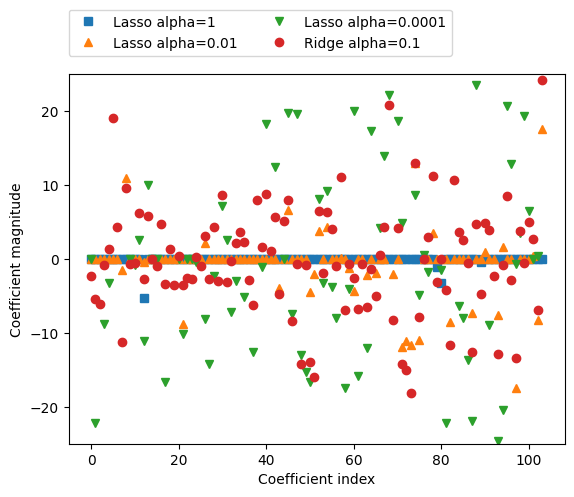

In [19]:
plt.plot(lasso.coef_, 's', label="Lasso alpha=1")
plt.plot(lasso001.coef_, '^', label="Lasso alpha=0.01")
plt.plot(lasso00001.coef_, 'v', label="Lasso alpha=0.0001")

plt.plot(ridge01.coef_, 'o', label="Ridge alpha=0.1")
plt.legend(ncol=2, loc=(0, 1.05))
plt.ylim(-25, 25)
plt.xlabel("Coefficient index") 
plt.ylabel("Coefficient magnitude")

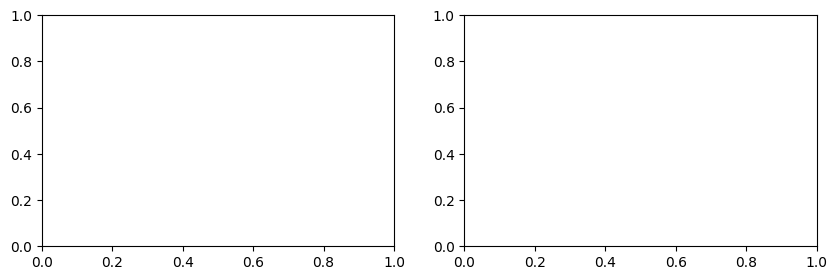

In [20]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC

X, y = mglearn.datasets.make_forge()

fig, axes = plt.subplots(1, 2, figsize=(10, 3))

for model, ax in zip([LinearSVC(), LogisticRegression()], axes):
    clf = model.fit(X, y)
    mglearn.plots.plot_2d_separator(clf, X, fill=False, eps=0.5,
                                    ax=ax, alpha=.7)
    mglearn.discreate_scatter(X[:, 0], y, ax=ax)
    ax.set_title("{}".format(clf.__class__.__name__))
    ax.set_xlabel("Feature 0")
    ax.set_ylabel("Feature 1")

axes[0].legend()
